In [1]:
import scanpy as sc
import squidpy as sq
import anndata
import os
import tarfile
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



Matplotlib is building the font cache; this may take a moment.
/Users/michael/anaconda3/envs/spatialenv/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/michael/anaconda3/envs/spatialenv/lib/python3.11/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/Users/michael/anaconda3/envs/spatialenv/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is depreca

In [2]:
adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
adata.var_names_make_unique()

/var/folders/lm/hv5s2ytj6jjfkgp634xv15180000gn/T/ipykernel_13110/3706321379.py:1: FutureWarning: Use `squidpy.datasets.visium` instead.
  adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
/Users/michael/anaconda3/envs/spatialenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 7.86M/7.86M [00:00<00:00, 39.2MB/s]
100%|██████████| 29.3M/29.3M [00:00<00:00, 35.7MB/s]
/Users/michael/anaconda3/envs/spatialenv/lib/python3.11/site-packages/scanpy/datasets/_datasets.py:555: FutureWarning: Use `squidpy.read.visium` instead.
  return read_visium(sample_dir, source_image_path=source_image_path)
/Users/michael/anaconda3/envs/spatialenv/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_uniqu

In [3]:
adata

AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [13]:
adata.var

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,False,0,0.000000,0.000000,100.000000,0.0,0.000000
FAM138A,ENSG00000237613,Gene Expression,GRCh38,False,0,0.000000,0.000000,100.000000,0.0,0.000000
OR4F5,ENSG00000186092,Gene Expression,GRCh38,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,False,63,0.015861,0.015737,98.438662,64.0,4.174387
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,False,0,0.000000,0.000000,100.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38,False,1,0.000248,0.000248,99.975217,1.0,0.693147
AC023491.2,ENSG00000278633,Gene Expression,GRCh38,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AC007325.1,ENSG00000276017,Gene Expression,GRCh38,False,0,0.000000,0.000000,100.000000,0.0,0.000000
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,False,120,0.030235,0.029787,97.026022,122.0,4.812184


In [6]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")

In [7]:
adata.var

,gene_ids,feature_types,genome,mt
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,False
FAM138A,ENSG00000237613,Gene Expression,GRCh38,False
OR4F5,ENSG00000186092,Gene Expression,GRCh38,False
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,False
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,False
...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38,False
AC023491.2,ENSG00000278633,Gene Expression,GRCh38,False
AC007325.1,ENSG00000276017,Gene Expression,GRCh38,False
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,False


In [8]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [9]:
# Filter out spots with less than 200 genes
sc.pp.filter_cells(adata, min_genes=200)

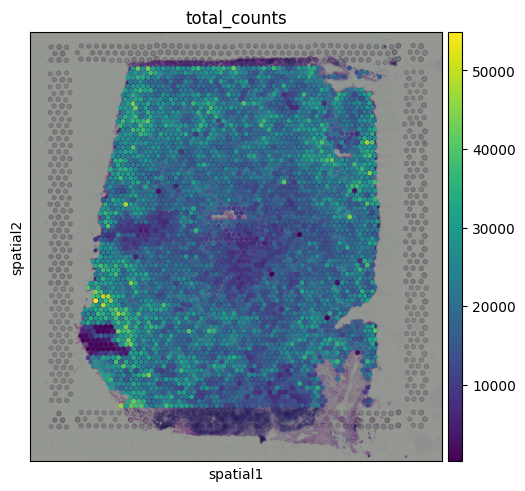

In [10]:
sq.pl.spatial_scatter(
    adata,
    color="total_counts",
    size=1.5
)

In [14]:
# Normalize to 10,000 total counts per spot
sc.pp.normalize_total(adata, target_sum=1e4)

# Log transform the data
sc.pp.log1p(adata)

In [15]:
adata

AnnData object with n_obs × n_vars = 4032 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'

In [16]:
sc.pp.highly_variable_genes(adata)

In [17]:
# Run PCA
sc.pp.pca(adata, n_comps=50)

In [18]:
# Calculate neighbors
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Leiden clustering
sc.tl.leiden(adata, resolution=0.8)

# Computing UMAP
sc.tl.umap(adata)

/var/folders/lm/hv5s2ytj6jjfkgp634xv15180000gn/T/ipykernel_13110/322035811.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.8)


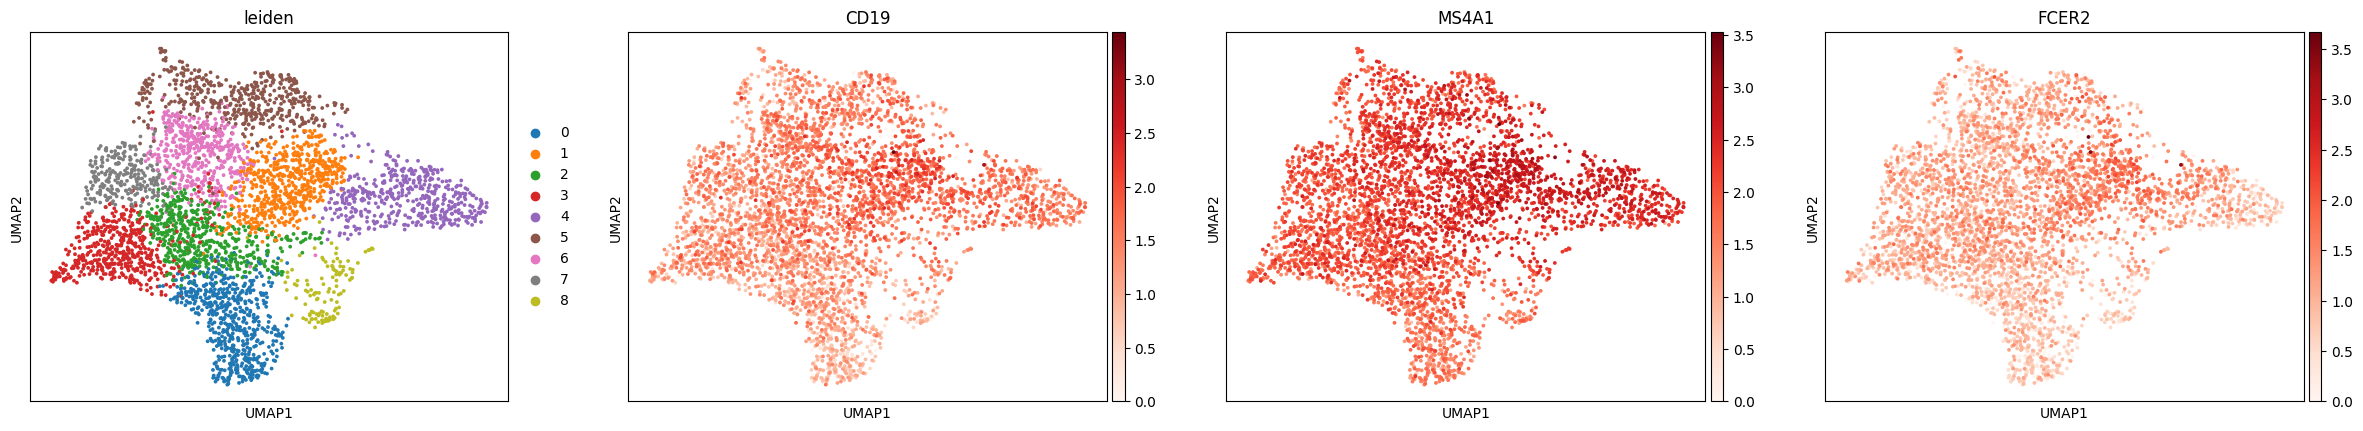

In [19]:
sc.pl.umap(adata, color=['leiden', 'CD19', 'MS4A1', 'FCER2'], cmap = 'Reds')

In [20]:
img = adata.uns['spatial']['V1_Human_Lymph_Node']['images']['hires']
print(f"Shape: {img.shape}, Type: {type(img)}, Dtype: {img.dtype}")

# First top left pixels
img[:3, :3, :]

Shape: (2000, 1921, 3), Type: <class 'numpy.ndarray'>, Dtype: float32


array([[[0.5882353 , 0.6       , 0.5764706 ],
        [0.58431375, 0.6       , 0.5686275 ],
        [0.5882353 , 0.6       , 0.5686275 ]],

       [[0.5882353 , 0.6       , 0.57254905],
        [0.5882353 , 0.6       , 0.5764706 ],
        [0.58431375, 0.6       , 0.5764706 ]],

       [[0.58431375, 0.6       , 0.5803922 ],
        [0.58431375, 0.6       , 0.5764706 ],
        [0.58431375, 0.59607846, 0.57254905]]], dtype=float32)

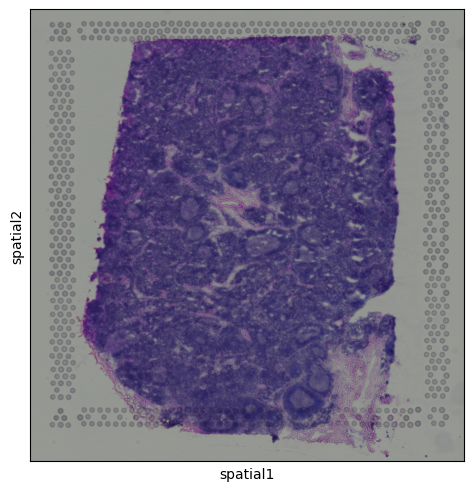

In [21]:
sq.pl.spatial_scatter(adata)